# Project Name: Titanic Survival Prediction: Comparative Analysis of Classification Algorithms

## Overview
The RMS Titanic disaster of 1912 provides a compelling dataset for binary classification analysis. This project uses machine learning to predict passenger survival based on demographic and ticket information, comparing multiple algorithms to identify the most effective approach.

You have:
- **Passenger data**: age, gender, family size, passenger class, fare, embarkation port
- **Target variable**: survival outcome (binary: survived/did not survive)
- **Missing data challenges**: incomplete age, cabin, and embarkation information

We will:
1. **Explore survival patterns** through data visualization and statistical analysis
2. **Engineer features** by handling missing values, encoding categories, and extracting titles from names
3. **Train multiple classifiers** (Logistic Regression, Decision Tree, Random Forest, SVM, KNN)
4. **Compare model performance** using accuracy, confusion matrices, and classification reports

## Goal
Identify key survival factors and determine the best-performing classification algorithm for this historical dataset. This analysis demonstrates practical machine learning workflows while providing insights into how socioeconomic factors influenced survival outcomes during maritime disasters.


#### Import Libraries

In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Model evaluation and preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

import base64
from IPython.display import display, HTML
import os

# Set visualization style
plt.style.use('default')
sns.set_palette("husl")

#### Notebook utility

In [3]:
image_paths = ["knn1","knn2","logreg1","logreg2","dc1","dc2","dc3","svm1","svm2","svm3"]
image_size = [700]*10
images_html = []

mime_map = {
    ".png": "image/png",
    ".jpg": "image/jpeg",
    ".jpeg": "image/jpeg",
    ".gif": "image/gif",
    ".webp": "image/webp"
}

for i, path in enumerate(image_paths):
    ext = os.path.splitext(path)[1].lower()
    mime = mime_map.get(ext, "image/png")

    with open("img/"+path+".png", "rb") as f:
        data = f.read()
    encoded = base64.b64encode(data).decode("utf-8")

    img_tag = f'<img src="data:{mime};base64,{encoded}" style="display: block; margin-left: auto; margin-right: auto; width: {image_size[i]}px;" /><br>'
    images_html.append(img_tag)

#### Load the Dataset


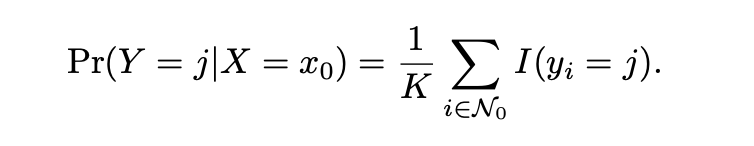

In [4]:
display(HTML(images_html[0]))


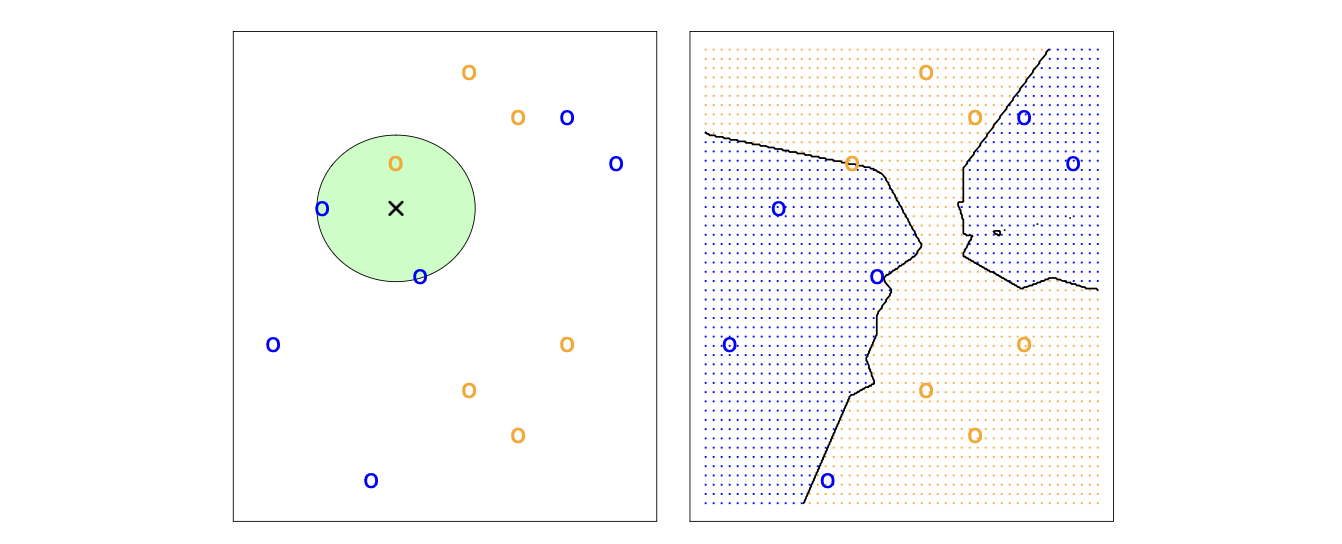

In [5]:
display(HTML(images_html[1]))


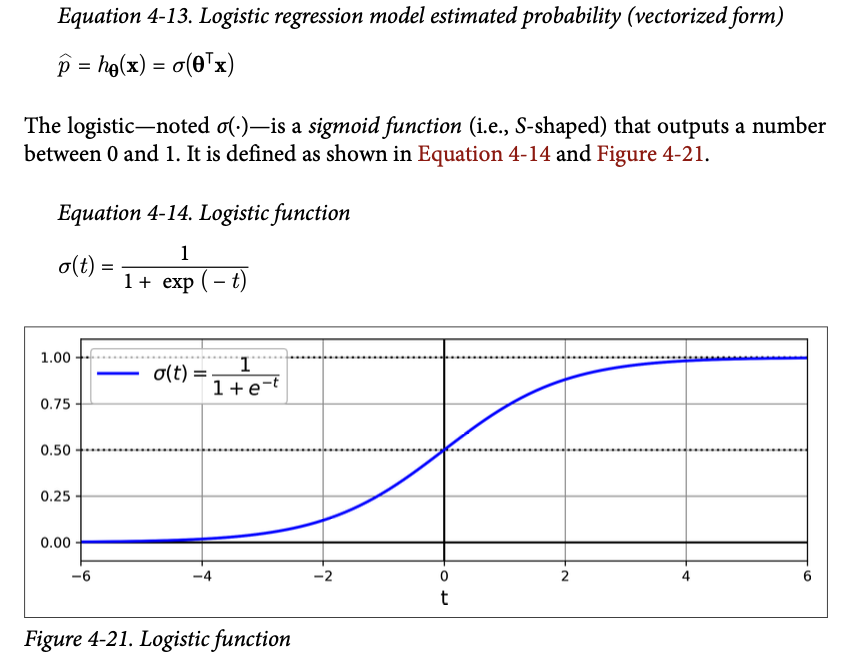

In [6]:
display(HTML(images_html[2]))


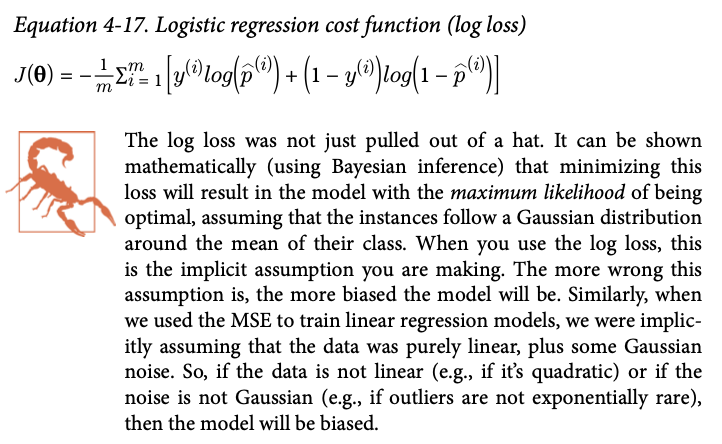

In [7]:
display(HTML(images_html[3]))


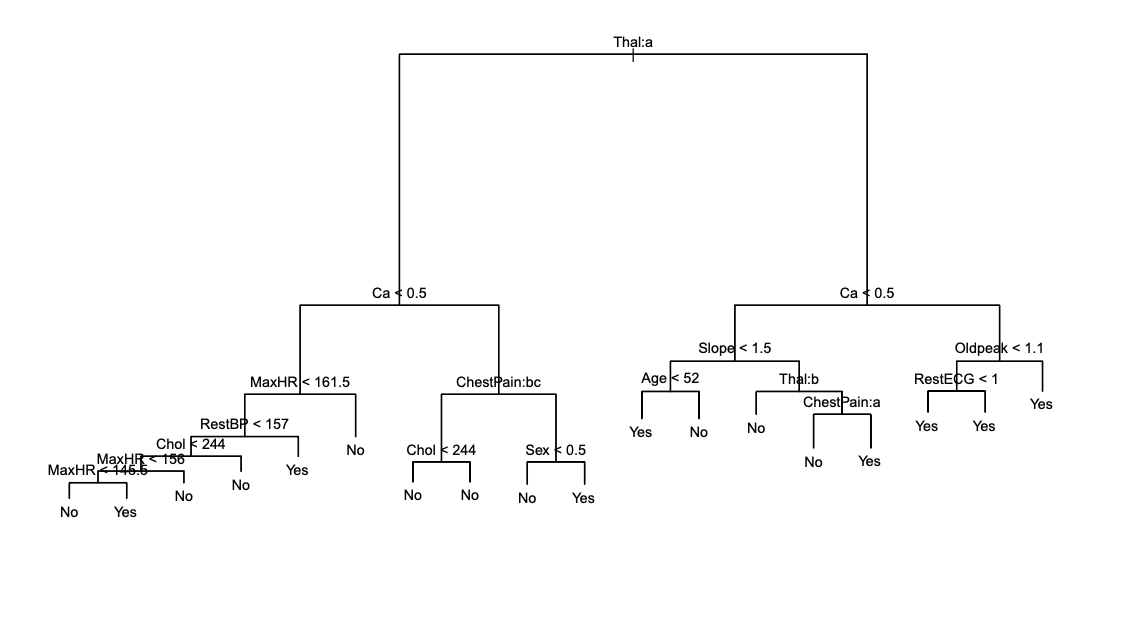

In [13]:
display(HTML(images_html[6]))


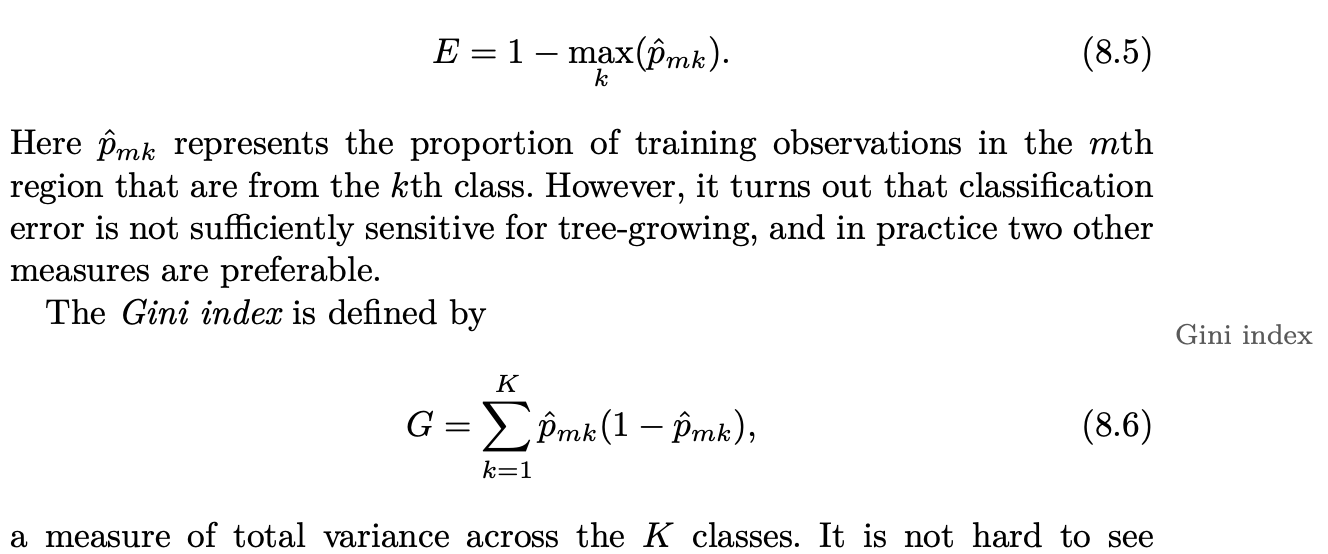

In [9]:
display(HTML(images_html[4]))


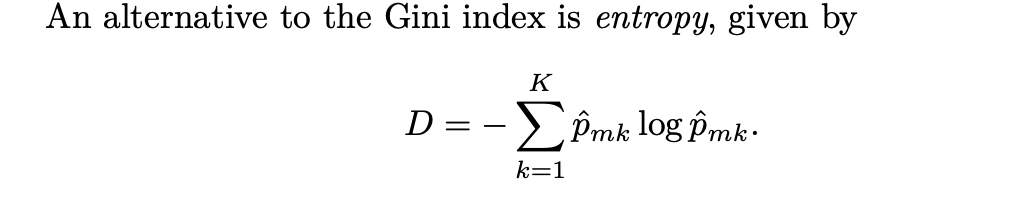

In [12]:
display(HTML(images_html[5]))


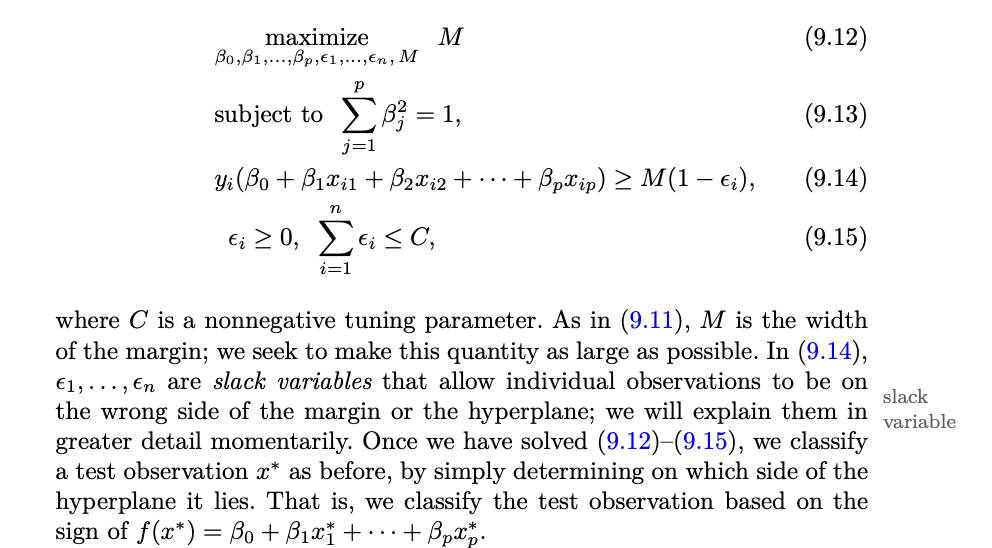

In [14]:
display(HTML(images_html[7]))


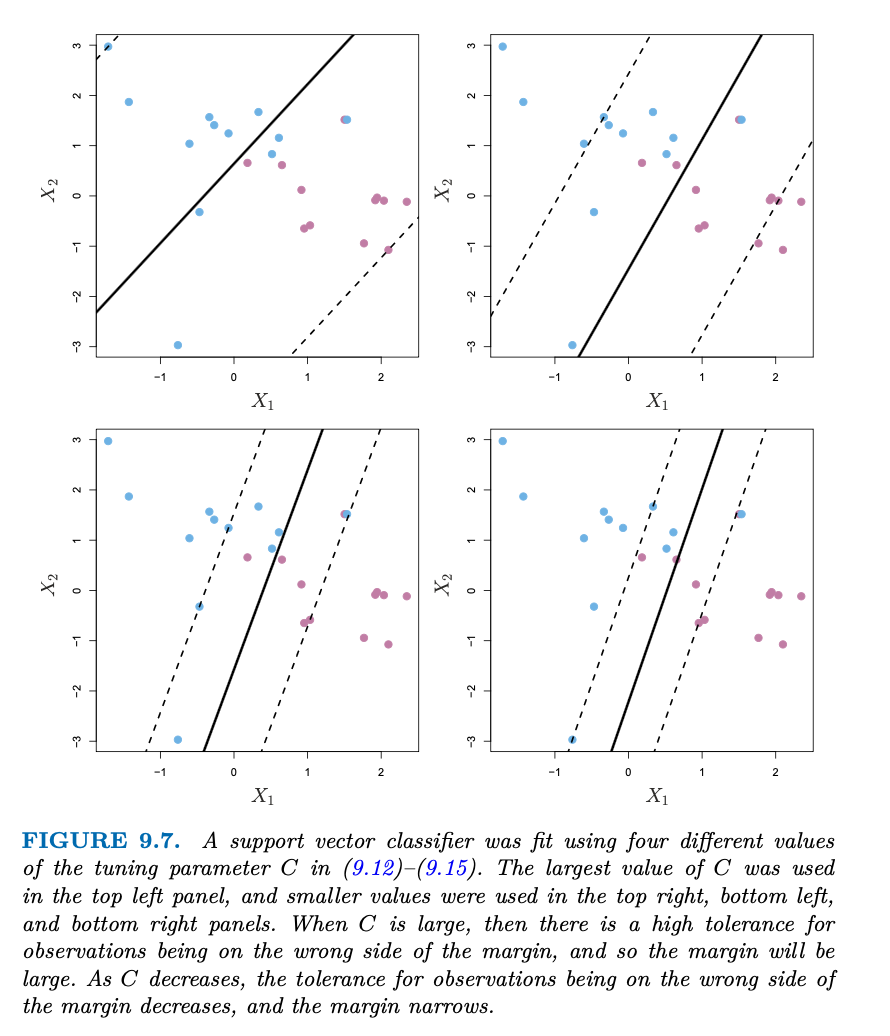

In [15]:
display(HTML(images_html[8]))


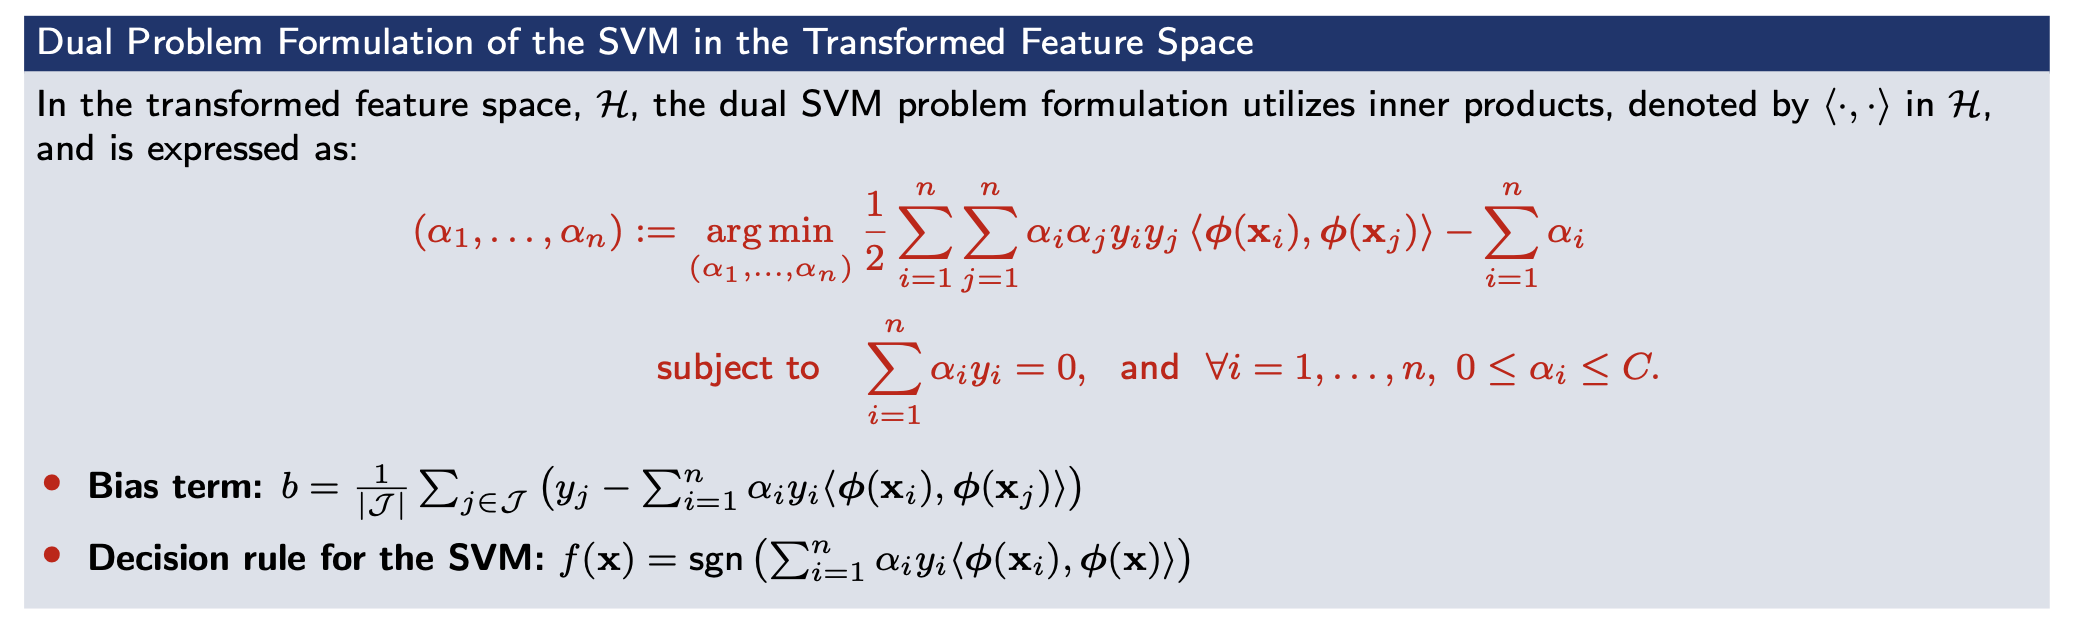

In [16]:
display(HTML(images_html[9]))

In [ ]:
df = pd.read_csv('Titanic-Dataset.csv')

print("Dataset loaded successfully")
print(f"Dataset shape: {df.shape}")
print("\nFirst 5 rows:")
print(df.head())

print("\nDataset information:")
print(df.info())

print("\nMissing values:")
print(df.isnull().sum())


Dataset loaded successfully
Dataset shape: (891, 12)

First 5 rows:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C12

#### Exploratory Data Analysis

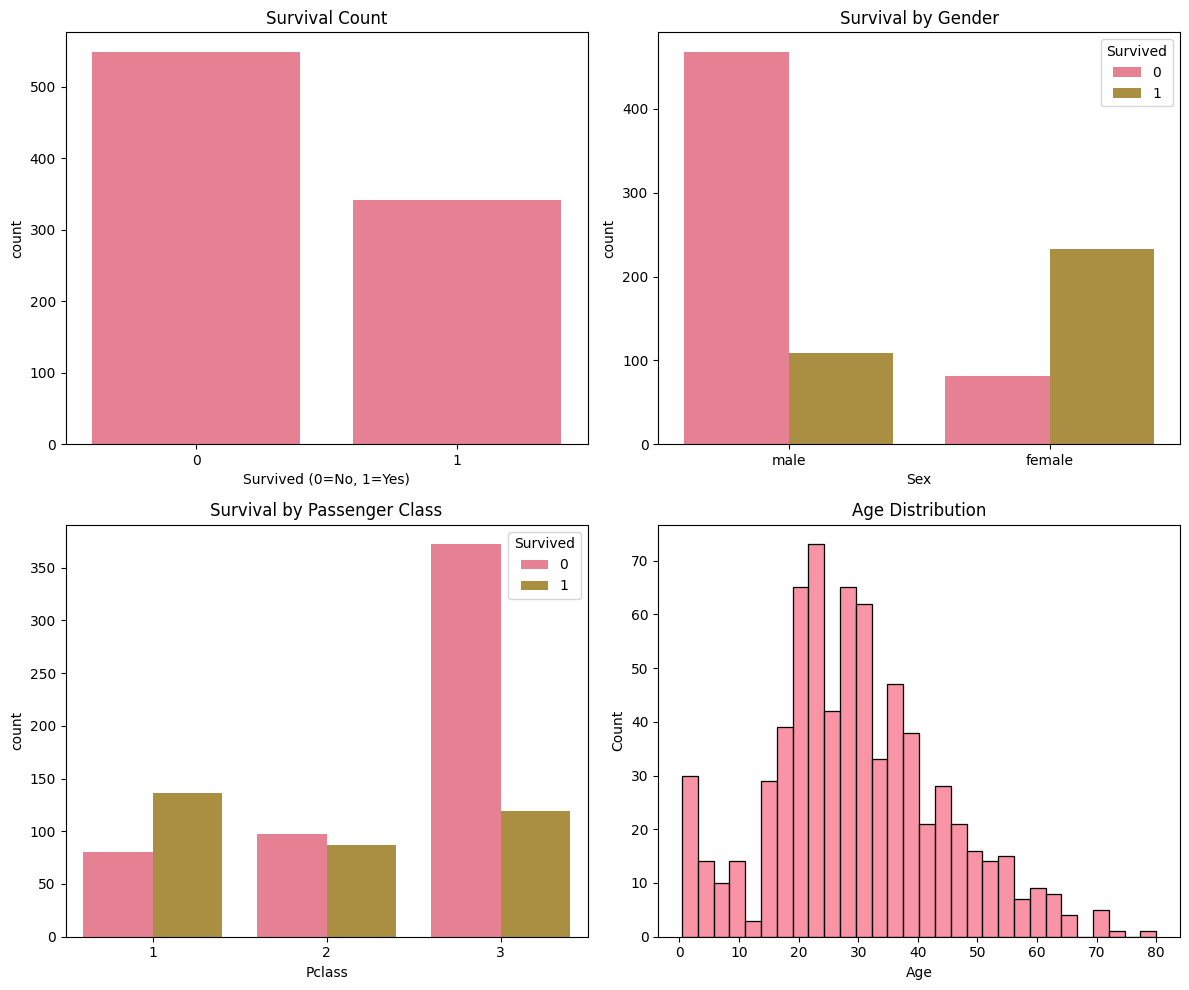

Survival Rate by Gender:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

Survival Rate by Class:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


In [3]:
# Create subplots for multiple visualizations
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Survival count
sns.countplot(data=df, x='Survived', ax=axes[0,0])
axes[0,0].set_title('Survival Count')
axes[0,0].set_xlabel('Survived (0=No, 1=Yes)')

# Survival by gender
sns.countplot(data=df, x='Sex', hue='Survived', ax=axes[0,1])
axes[0,1].set_title('Survival by Gender')

# Survival by passenger class
sns.countplot(data=df, x='Pclass', hue='Survived', ax=axes[1,0])
axes[1,0].set_title('Survival by Passenger Class')

# Age distribution
sns.histplot(data=df, x='Age', bins=30, ax=axes[1,1])
axes[1,1].set_title('Age Distribution')

plt.tight_layout()
plt.show()

# Print survival statistics
print("Survival Rate by Gender:")
print(df.groupby('Sex')['Survived'].mean())

print("\nSurvival Rate by Class:")
print(df.groupby('Pclass')['Survived'].mean())


#### Data Pre-processing

In [4]:
# Create a copy of the dataset for cleaning
df_clean = df.copy()

print("Original missing values:")
print(df_clean.isnull().sum())

# Handle missing Age values - fill with median
# Median is less affected by outliers than mean
age_median = df_clean['Age'].median()
df_clean['Age'].fillna(age_median, inplace=True)
print(f"\nFilled missing Age values with median: {age_median}")

# Handle missing Embarked values - fill with mode (most common)
embarked_mode = df_clean['Embarked'].mode()[0]
df_clean['Embarked'].fillna(embarked_mode, inplace=True)
print(f"Filled missing Embarked values with mode: {embarked_mode}")

# Drop Cabin column due to too many missing values (77% missing)
df_clean.drop('Cabin', axis=1, inplace=True)
print("Dropped Cabin column due to excessive missing values")

print("\nMissing values after cleaning:")
print(df_clean.isnull().sum())


Original missing values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Filled missing Age values with median: 28.0
Filled missing Embarked values with mode: S
Dropped Cabin column due to excessive missing values

Missing values after cleaning:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


/var/folders/_7/z7xp51ln57jdfyvhm58j4dhr0000gn/T/ipykernel_91006/3964214139.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['Age'].fillna(age_median, inplace=True)
/var/folders/_7/z7xp51ln57jdfyvhm58j4dhr0000gn/T/ipykernel_91006/3964214139.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al

#### Feature Engineering

In [5]:
# Convert categorical variables to numerical

# Convert Sex to numerical (0 for female, 1 for male)
label_encoder = LabelEncoder()
df_clean['Sex_encoded'] = label_encoder.fit_transform(df_clean['Sex'])
print("Sex encoding: female=0, male=1")

# Convert Embarked to numerical using one-hot encoding
embarked_dummies = pd.get_dummies(df_clean['Embarked'], prefix='Embarked')
df_clean = pd.concat([df_clean, embarked_dummies], axis=1)
print("Created dummy variables for Embarked port")

# Optional: Extract title from Name (Mr, Mrs, Miss, etc.)
df_clean['Title'] = df_clean['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
# Group rare titles
df_clean['Title'] = df_clean['Title'].replace(['Lady', 'Countess','Capt', 'Col',
                                               'Don', 'Dr', 'Major', 'Rev', 'Sir', 
                                               'Jonkheer', 'Dona'], 'Other')
df_clean['Title'] = df_clean['Title'].replace('Mlle', 'Miss')
df_clean['Title'] = df_clean['Title'].replace('Ms', 'Miss')
df_clean['Title'] = df_clean['Title'].replace('Mme', 'Mrs')

# Encode titles
df_clean['Title_encoded'] = label_encoder.fit_transform(df_clean['Title'])
print("Extracted and encoded titles from names")

# Drop columns that won't be used for prediction
columns_to_drop = ['PassengerId', 'Name', 'Sex', 'Ticket', 'Embarked', 'Title']
df_clean.drop(columns_to_drop, axis=1, inplace=True)

print(f"\nFinal dataset shape: {df_clean.shape}")
print("\nFinal columns:")
print(df_clean.columns.tolist())


Sex encoding: female=0, male=1
Created dummy variables for Embarked port
Extracted and encoded titles from names

Final dataset shape: (891, 11)

Final columns:
['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_encoded', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_encoded']


#### Define Features and Labels

In [6]:
# Separate features (X) and target variable (y)
# Features: all columns except 'Survived'
X = df_clean.drop('Survived', axis=1)
# Target: the 'Survived' column (what we want to predict)
y = df_clean['Survived']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

print("\nFeature columns:")
print(X.columns.tolist())

print(f"\nTarget distribution:")
print(f"Survived: {sum(y)} passengers")
print(f"Did not survive: {len(y) - sum(y)} passengers")
print(f"Survival rate: {sum(y)/len(y):.2%}")


Features shape: (891, 10)
Target shape: (891,)

Feature columns:
['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_encoded', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_encoded']

Target distribution:
Survived: 342 passengers
Did not survive: 549 passengers
Survival rate: 38.38%


#### Defining Model and Splitting Train-Test Data

In [7]:
# Split data into training and testing sets
# 80% for training, 20% for testing
# random_state ensures reproducible results
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

print(f"\nTraining set survival rate: {sum(y_train)/len(y_train):.2%}")
print(f"Test set survival rate: {sum(y_test)/len(y_test):.2%}")

# The stratify parameter ensures both sets have similar survival rates

# Initialize different classification algorithms
classifiers = {
    # Logistic Regression: Linear model for binary classification
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    
    # Decision Tree: Creates a tree of if-else conditions
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    
    # Random Forest: Combines multiple decision trees
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    
    # Support Vector Machine: Finds optimal boundary between classes
    'SVM': SVC(random_state=42),
    
    # K-Nearest Neighbors: Classifies based on nearest neighbors
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

print("Initialized classifiers:")
for name in classifiers.keys():
    print(f"- {name}")


Training set size: 712 samples
Test set size: 179 samples

Training set survival rate: 38.34%
Test set survival rate: 38.55%
Initialized classifiers:
- Logistic Regression
- Decision Tree
- Random Forest
- SVM
- KNN


#### Train and Evaluate Models

In [8]:
# Dictionary to store results
results = {}

print("Training and evaluating models...\n")

for name, classifier in classifiers.items():
    print(f"{'='*50}")
    print(f"Training {name}")
    print(f"{'='*50}")
    
    # Train the model
    classifier.fit(X_train, y_train)
    
    # Make predictions on test set
    y_pred = classifier.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    
    print(f"Accuracy: {accuracy:.4f}")
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f"\nConfusion Matrix:")
    print(cm)
    
    # Classification Report
    print(f"\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("\n")


Training and evaluating models...

Training Logistic Regression
Accuracy: 0.7989

Confusion Matrix:
[[98 12]
 [24 45]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       110
           1       0.79      0.65      0.71        69

    accuracy                           0.80       179
   macro avg       0.80      0.77      0.78       179
weighted avg       0.80      0.80      0.79       179



Training Decision Tree
Accuracy: 0.8212

Confusion Matrix:
[[96 14]
 [18 51]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.87      0.86       110
           1       0.78      0.74      0.76        69

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



Training Random Forest
Accuracy: 0.8268

Confusion Matrix:
[[98 12]
 [19 50]]

Classification Rep

#### Compare Model Performance

Model Performance Comparison:
Random Forest       : 0.8268
Decision Tree       : 0.8212
Logistic Regression : 0.7989
KNN                 : 0.6480
SVM                 : 0.6201

Best performing model: Random Forest
Best accuracy: 0.8268


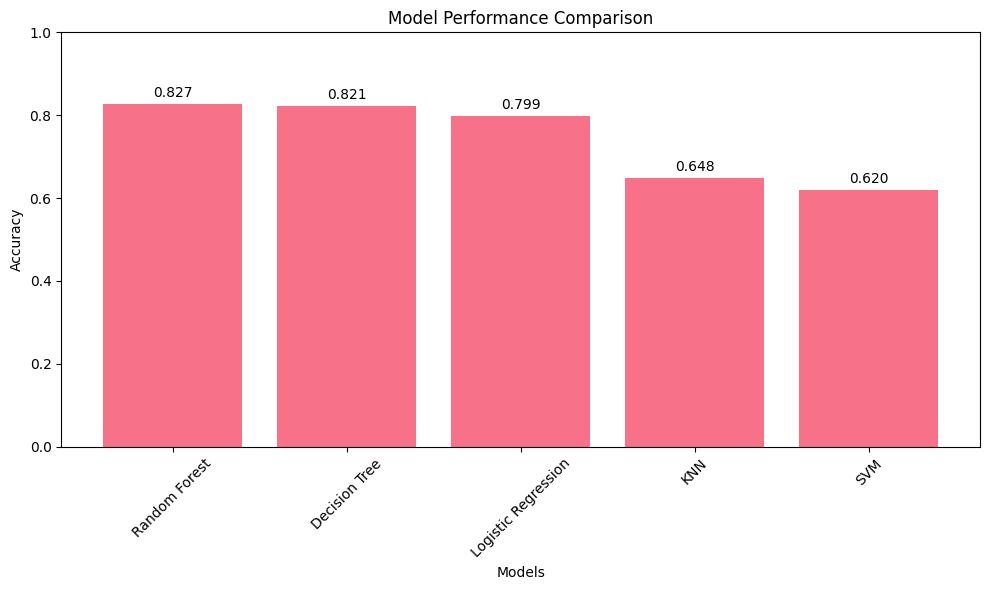


Model Analysis:
- Random Forest performed well, likely due to its ability to handle complex patterns
- Logistic Regression shows good performance, indicating linear relationships exist
- Decision Tree provides interpretable rules but may overfit


In [9]:
# Create a comparison table
results_df = pd.DataFrame(list(results.items()), 
                         columns=['Model', 'Accuracy'])
results_df = results_df.sort_values('Accuracy', ascending=False)

print("Model Performance Comparison:")
print("="*40)
for idx, row in results_df.iterrows():
    print(f"{row['Model']:<20}: {row['Accuracy']:.4f}")

# Find the best model
best_model = results_df.iloc[0]['Model']
best_accuracy = results_df.iloc[0]['Accuracy']

print(f"\nBest performing model: {best_model}")
print(f"Best accuracy: {best_accuracy:.4f}")

# Visualize results
plt.figure(figsize=(10, 6))
bars = plt.bar(results_df['Model'], results_df['Accuracy'])
plt.title('Model Performance Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.ylim(0, 1)

# Add accuracy values on top of bars
for bar, accuracy in zip(bars, results_df['Accuracy']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{accuracy:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Analysis of results
print("\nModel Analysis:")
if 'Random Forest' in results and results['Random Forest'] > 0.8:
    print("- Random Forest performed well, likely due to its ability to handle complex patterns")
if 'Logistic Regression' in results and results['Logistic Regression'] > 0.75:
    print("- Logistic Regression shows good performance, indicating linear relationships exist")
if 'Decision Tree' in results:
    print("- Decision Tree provides interpretable rules but may overfit")


# Conclusion

This notebook demonstrated a complete machine learning pipeline for Titanic survival prediction. Key steps included:

1. **Data Cleaning**: Handled missing values in Age and Embarked columns
2. **Feature Engineering**: Converted categorical variables and extracted titles
3. **Model Training**: Implemented 5 different classification algorithms
4. **Evaluation**: Compared models using accuracy and detailed metrics

The analysis revealed that passenger class, gender, and age were strong predictors of survival. The best-performing model can be further improved through hyperparameter tuning and cross-validation.

**Next Steps**: Consider feature scaling, hyperparameter optimization, and ensemble methods for better performance.
